In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')

In [3]:
import yfinance as yf
import datetime as dt

#ALPHABET STOCK PRICE
stock = "GOOG"
start = dt.datetime(2000 , 1 , 1)
end =  dt.datetime(2025 , 6 , 20)

df = yf.download(stock , start , end)

C:\Users\pj900\AppData\Local\Temp\ipykernel_12404\4226443545.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock , start , end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.484366,2.576470,2.375919,2.475947,897427216
2004-08-20,2.681699,2.700763,2.488327,2.500954,458857488
2004-08-23,2.708686,2.809705,2.700021,2.742112,366857939
2004-08-24,2.596526,2.763157,2.564339,2.754244,306396159
2004-08-25,2.624504,2.674023,2.572014,2.598754,184645512


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5242 entries, 2004-08-19 to 2025-06-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5242 non-null   float64
 1   (High, GOOG)    5242 non-null   float64
 2   (Low, GOOG)     5242 non-null   float64
 3   (Open, GOOG)    5242 non-null   float64
 4   (Volume, GOOG)  5242 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 245.7 KB


In [6]:
df.isnull().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5242.000000,5242.000000,5242.000000,5242.000000,5.242000e+03
mean,50.394435,50.916811,49.860538,50.374227,1.117376e+08
std,49.444101,49.983762,48.908058,49.417328,1.478384e+08
min,2.476194,2.519028,2.375919,2.455892,1.584340e+05
25%,13.132980,13.287974,13.007202,13.152170,2.627596e+07
50%,28.089801,28.375613,27.842604,28.154884,5.007100e+07
75%,69.253351,70.147542,68.429938,69.124617,1.358142e+08
max,207.224548,208.212225,203.782599,204.022044,1.650833e+09


In [8]:
df = df.reset_index()

In [9]:
df.shape

(5242, 6)

In [10]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2004-08-19,2.484366,2.576470,2.375919,2.475947,897427216
1,2004-08-20,2.681699,2.700763,2.488327,2.500954,458857488
2,2004-08-23,2.708686,2.809705,2.700021,2.742112,366857939
3,2004-08-24,2.596526,2.763157,2.564339,2.754244,306396159
4,2004-08-25,2.624504,2.674023,2.572014,2.598754,184645512


In [12]:
df.to_csv("google.csv")

In [13]:
data01 = pd.read_csv("google.csv")

In [14]:
#candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,GOOG,GOOG,GOOG,GOOG,GOOG
1,0,2004-08-19,2.484365701675415,2.576470064810986,2.3759192785245054,2.4759466409530924,897427216
2,1,2004-08-20,2.6816985607147217,2.7007631515270396,2.488327040389078,2.500953972188937,458857488
3,2,2004-08-23,2.708686351776123,2.809704894801386,2.700020800407022,2.742111603240293,366857939
4,3,2004-08-24,2.5965261459350586,2.763156826514091,2.56433855744627,2.7542438363684476,306396159


In [16]:
df = df.drop(['Date'], axis = 1)

C:\Users\pj900\AppData\Local\Temp\ipykernel_12404\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



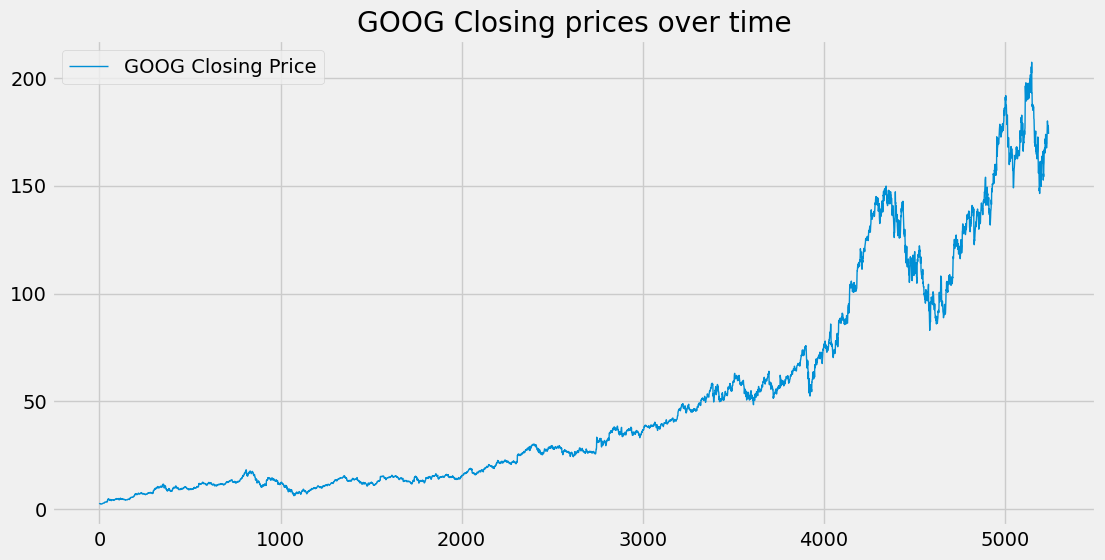

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

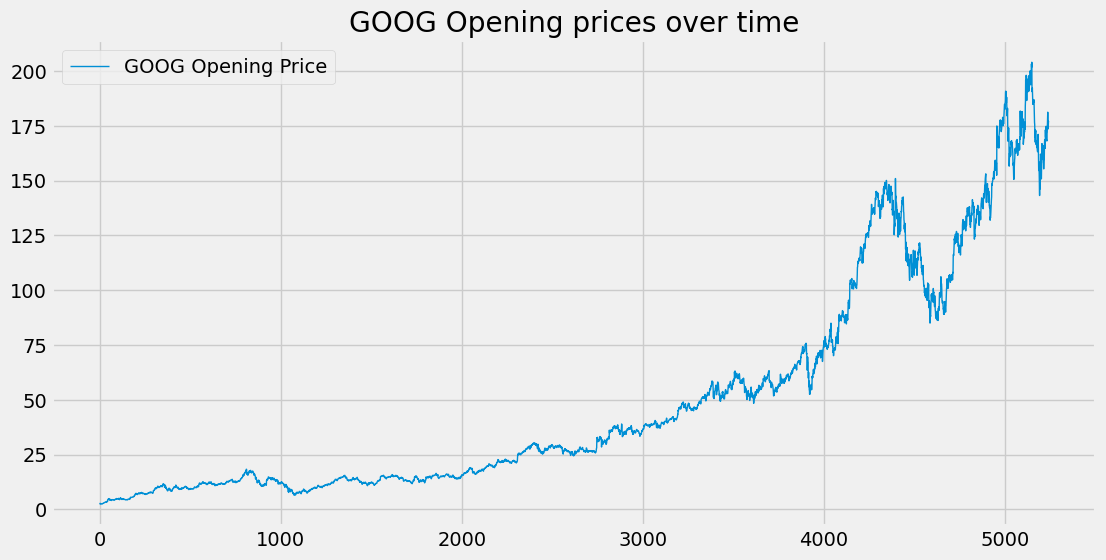

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

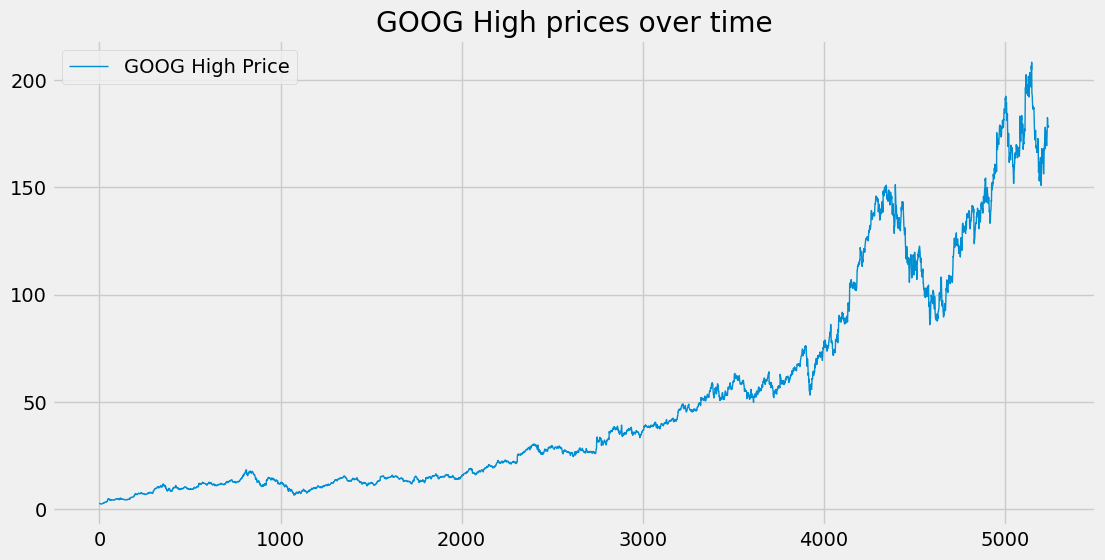

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

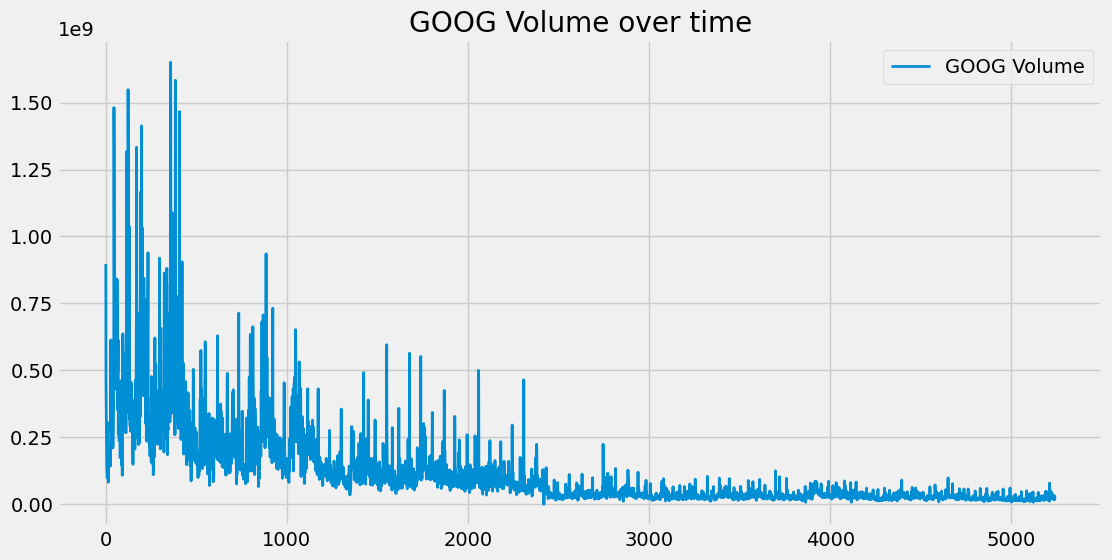

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [21]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [22]:
df01 = pd.DataFrame(temp_data)

In [23]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [24]:

ma100 = df.Close.rolling(100).mean()

In [25]:
ma200 = df.Close.rolling(200).mean()

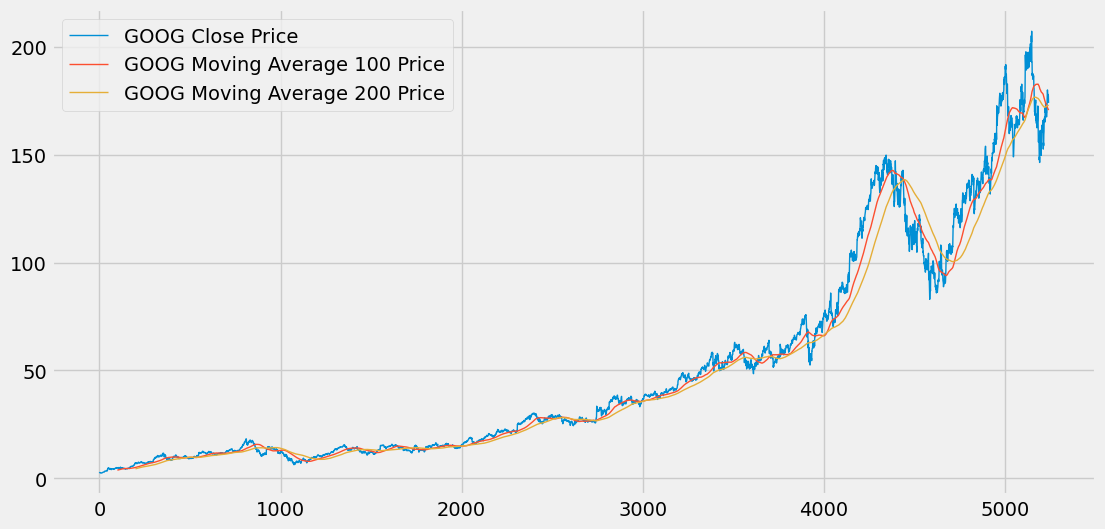

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [27]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [28]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

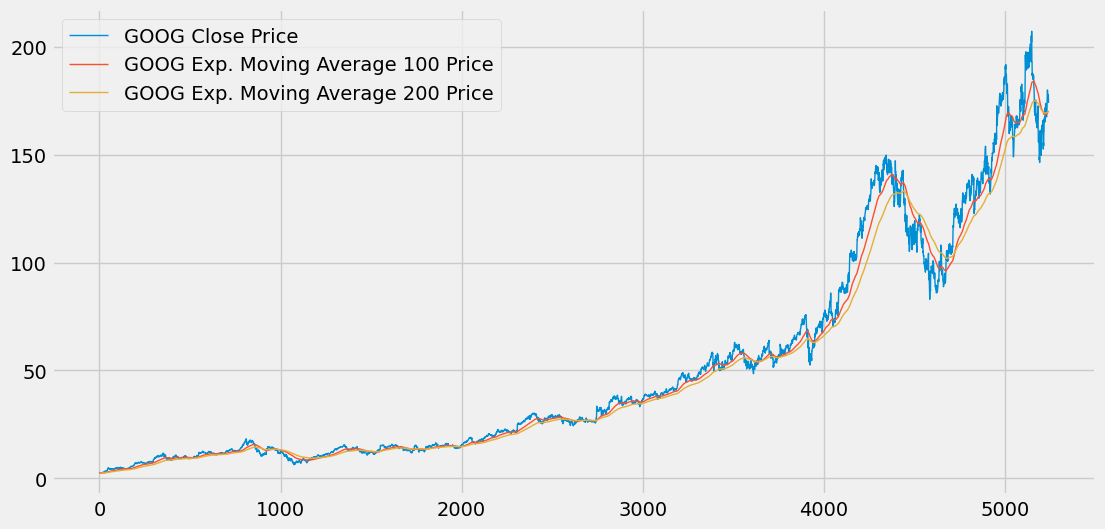

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [30]:
# Split data into training and testing (70%-30%)
train_size = int(len(df) * 0.7)

data_training = df[['Close']].iloc[:train_size]
data_testing = df[['Close']].iloc[train_size:]

In [31]:
data_training.shape

(3669, 1)

In [32]:
data_testing.shape

(1573, 1)

In [33]:
df['Close'].shape

(5242, 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [35]:
data_training_array = scaler.fit_transform(data_training)

In [36]:
data_training_array

array([[1.34924783e-04],
       [3.39309355e-03],
       [3.83868978e-03],
       ...,
       [9.32064642e-01],
       [9.31170135e-01],
       [9.31006060e-01]])

In [37]:
data_training_array.shape[0]

3669

In [38]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [39]:
x_train.shape

(3569, 100, 1)

 ### LSTM Input -> 3D Array (batch_size, time_steps, seq_len) LSTM 2D OR 3D 2D -> (batch_sizem units) 3D -> (batch_size, time_steps, units)

In [40]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [41]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\pj900\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 29s 214ms/step - loss: 0.0515
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step - loss: 0.0061
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 202ms/step - loss: 0.0047
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - loss: 0.0047
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - loss: 0.0040
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - loss: 0.0033
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - loss: 0.0036
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - loss: 0.0030
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.0028
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - loss: 0.0028
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - loss: 0.0025
Epoch 12/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - loss: 0.0024
Epoch 13/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - loss: 0.0026
Epoch 14/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - loss: 0.0022
Epoch 15/50
112

In [44]:
x_train.shape[1]

100

In [45]:
x_train.shape[2]

1

In [46]:
past_100_days = data_training.tail(100)

In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

Price,Close
Ticker,GOOG
0,54.732662
1,54.858414
2,52.225063
3,54.454811
4,53.256935


In [48]:
input_data = scaler.transform(final_df)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [50]:
x_test.shape

(1573, 100, 1)

In [51]:
y_predicted = model.predict(x_test)

# Reshape if necessary (LSTM outputs can sometimes be 3D or flat arrays)
y_predicted = y_predicted.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)  # Only if y_test isn't already shaped like that

# Inverse transform both predicted and true values
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


In [52]:
y_predicted.shape

(1573, 1)

In [53]:
scaler.scale_

array([0.01651103])

In [54]:
model.save('stock_dl_model.h5')